In [1]:
import pandas as pd
datos = pd.read_csv("housing.csv")


In [2]:
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='latitude', ylabel='longitude'>

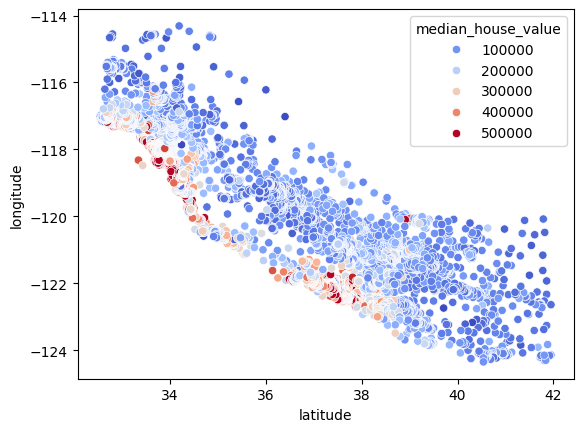

In [3]:
import seaborn as sb
sb.scatterplot(x="latitude",y="longitude", data=datos, hue="median_house_value",palette="coolwarm")

<Axes: xlabel='latitude', ylabel='longitude'>

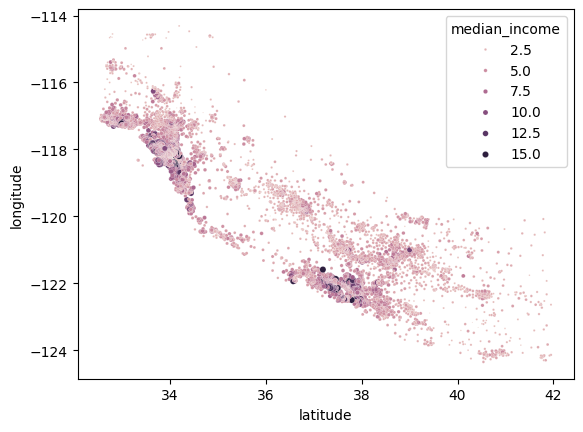

In [14]:
sb.scatterplot(x="latitude",y="longitude", data=datos, hue="median_income",
               size=datos["median_income"],sizes=(0.5,20))

In [15]:
datos.loc[:,["latitude","longitude","median_income"]]

,latitude,longitude,median_income
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


In [24]:
from sklearn.cluster import KMeans
X = datos.loc[:,["latitude","longitude","median_income"]]
modelo = KMeans(n_clusters=6)
predicciones = modelo.fit_predict(X)


In [19]:
predicciones.shape

(20640,)

In [25]:
X["segmento_economico"] = predicciones
X

,latitude,longitude,median_income,segmento_economico
0,37.88,-122.23,8.3252,2
1,37.86,-122.22,8.3014,2
2,37.85,-122.24,7.2574,2
3,37.85,-122.25,5.6431,2
4,37.85,-122.25,3.8462,0
...,...,...,...,...
20635,39.48,-121.09,1.5603,0
20636,39.49,-121.21,2.5568,0
20637,39.43,-121.22,1.7000,0
20638,39.43,-121.32,1.8672,0


In [26]:
X["segmento_economico"].value_counts()

segmento_economico
0    5348
3    4962
1    4041
2    2929
5    2834
4     526
Name: count, dtype: int64

<Axes: xlabel='latitude', ylabel='longitude'>

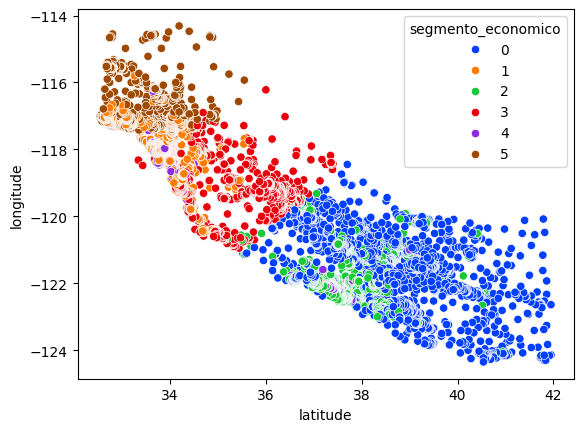

In [28]:
sb.scatterplot(x="latitude",y="longitude", data=X, hue="segmento_economico",palette="bright")

C:\Users\joseA\AppData\Local\Temp\ipykernel_19152\3196327443.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x="segmento_economico",data=X, palette="bright")


<Axes: xlabel='segmento_economico', ylabel='count'>

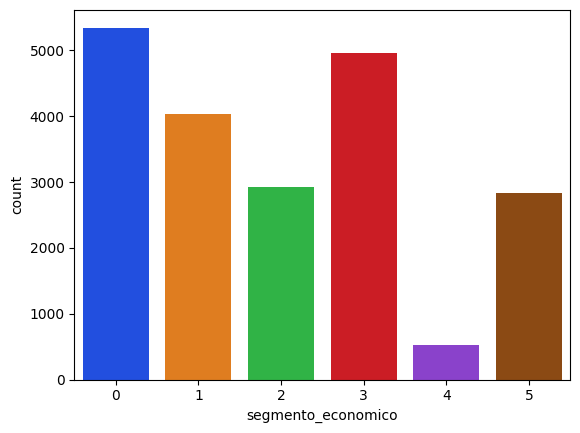

In [31]:
sb.countplot(x="segmento_economico",data=X, palette="bright")

In [32]:
X.groupby(["segmento_economico"])["median_income"].mean()

segmento_economico
0     2.763088
1     5.374654
2     5.453794
3     2.710834
4    10.604050
5     2.961055
Name: median_income, dtype: float64